# 1. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 준비

In [2]:
data = pd.read_csv("wine.csv")
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

- alcohol 피처에 Null값 2개 존재
- nonflavanoid_phenols 피처에 Null값 5개 존재

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# 3. 목표값에서 고윳값 확인

In [5]:
data["class"].unique()    # Wine 등급이 0, 1, 2 등급

array([0, 1, 2], dtype=int64)

In [6]:
data["class"].nunique()   # MultiCalssification

3

In [7]:
data["class"].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

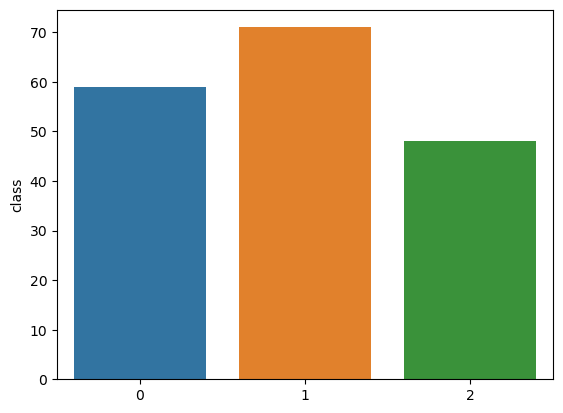

In [8]:
sns.barplot(x = data["class"].value_counts().index, y = data["class"].value_counts())

# 4. 결측치 처리하기

In [10]:
data.isna()  # Null 값이 있을 경우 True

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.sum()

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [12]:
data.mean()

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [13]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [14]:
data = data.dropna()   # Null 값 제거

In [15]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

Cf_ 빅데이터는 데이터가 많아서 데이터를 지워도 영향력은 미미함.

# 5. 데이터 스케일링

## 5.1 데이터 스케일링 종류 3가지

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [17]:
ss = StandardScaler()    # ( 객체 생성 ; 자기자신 - mean / std - mean)
ms = MinMaxScaler()
rs = RobustScaler()

In [18]:
ss.fit(data)
ss_scaled = ss.transform(data)
ms.fit(data)
ms_scaled = ms.transform(data)
rs.fit(data)
rs_scaled = rs.transform(data)

In [19]:
ss_scaled = pd.DataFrame(ss_scaled, columns = data.columns)
ms_scaled = pd.DataFrame(ms_scaled, columns = data.columns)
rs_scaled = pd.DataFrame(rs_scaled, columns = data.columns)

In [20]:
round(ss_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.50,-1.43,-3.68,-2.71,-2.16,-2.09,-1.67,-1.85,-2.07,-1.66,-2.07,-1.87,-1.48,-1.21
25%,-0.81,-0.67,-0.52,-0.71,-0.84,-0.89,-0.87,-0.78,-0.62,-0.79,-0.79,-0.95,-0.77,-1.21
50%,0.04,-0.43,-0.05,-0.02,-0.11,0.02,0.11,-0.19,-0.04,-0.14,0.06,0.25,-0.23,0.07
75%,0.84,0.70,0.72,0.59,0.59,0.82,0.86,0.69,0.65,0.49,0.70,0.80,0.76,1.35
max,2.18,3.05,3.12,3.16,3.77,2.54,3.04,2.35,3.53,3.39,3.26,1.96,2.95,1.35


In [21]:
round(ms_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.53,0.32,0.54,0.46,0.36,0.45,0.35,0.44,0.37,0.33,0.39,0.49,0.33,0.47
std,0.21,0.22,0.15,0.17,0.17,0.22,0.21,0.24,0.18,0.20,0.19,0.26,0.23,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.47,0.34,0.22,0.26,0.17,0.25,0.26,0.17,0.24,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.35,0.46,0.38,0.40,0.36,0.30,0.40,0.55,0.28,0.50
75%,0.71,0.48,0.65,0.56,0.46,0.63,0.54,0.60,0.49,0.43,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [22]:
round(rs_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,-0.03,0.31,0.04,0.01,0.08,-0.01,-0.06,0.13,0.03,0.11,-0.04,-0.14,0.15,-0.03
std,0.61,0.73,0.81,0.77,0.70,0.59,0.58,0.68,0.79,0.78,0.67,0.57,0.66,0.39
min,-1.54,-0.73,-2.94,-2.07,-1.44,-1.23,-1.03,-1.14,-1.60,-1.18,-1.42,-1.21,-0.81,-0.50
25%,-0.52,-0.18,-0.38,-0.53,-0.51,-0.53,-0.56,-0.41,-0.46,-0.51,-0.57,-0.69,-0.35,-0.50
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.48,0.82,0.62,0.47,0.49,0.47,0.44,0.59,0.54,0.49,0.43,0.31,0.65,0.50
max,1.29,2.54,2.56,2.44,2.72,1.48,1.70,1.73,2.81,2.74,2.14,0.98,2.08,0.50


## 5.2 데이터 스케일링 (정규화)

In [23]:
X = data.drop("class", axis=1)
Y = data["class"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [25]:
ms = MinMaxScaler()
ms.fit(X_train)
X_train_scaler = ms.transform(X_train)
X_test_scaler = ms.transform(X_test)

In [26]:
print(X_train.shape, X_test.shape)

(136, 13) (35, 13)


In [27]:
print(Y_train.shape, Y_test.shape)

(136,) (35,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier   # ( 모델 평가 )

In [29]:
knc = KNeighborsClassifier()
knc.fit(X_train_scaler, Y_train)
pred = knc.predict(X_test_scaler)

In [30]:
pred

array([0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.9714285714285714

# 6. 하이퍼 파라미터 튜닝하기

In [32]:
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(X_train_scaler, Y_train)
pred = knc.predict(X_test_scaler)

In [33]:
accuracy_score(Y_test, pred)

1.0

In [34]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train_scaler, Y_train)
pred = knc.predict(X_test_scaler)

In [35]:
accuracy_score(Y_test, pred)    # knr.n_neighbors = 5

0.9714285714285714

In [36]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_scaler, Y_train)
pred = knc.predict(X_test_scaler)

In [37]:
accuracy_score(Y_test, pred)  

0.9714285714285714

In [38]:
for i in range(1, 21):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train_scaler, Y_train)
    pred = knc.predict(X_test_scaler)
    print(accuracy_score(Y_test, pred))

0.9714285714285714
1.0
0.9714285714285714
1.0
0.9714285714285714
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


- 정확도 100% 중 아무거나 사용하면 됨